In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def get_batches(X,y,batch_size,i):
    X_new = X[i:i+batch_size,:]
    y_new = y[i:i+batch_size]    
    return X_new, y_new

# Mini-Batch Gradient Descent
def MiniBatchGradientDescent(X,y,theta,iters,learning_rate=0.1,batch_size=10):
    alpha = learning_rate
    num_batches = int(X.shape[0]/batch_size)  
    cost_array = np.zeros(iters)
    for j in range(iters):
        for i in range(0,num_batches): #chunks
            X_batch, y_batch = get_batches(X,y,batch_size,i)
            #print(X_batch.shape, y_batch.shape)
            new_theta, new_cost = gradient_descent2(X_batch, y_batch, theta, alpha)
            theta = new_theta
        cost_array[j] = new_cost
    return cost_array

In [4]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

def gradient_descent2(X, y, theta, alpha):
    cost_array = 0
    m = y.size
    cost, error = cost_function(X, y, theta)
    theta = theta - (alpha * (1/m) * np.dot(X.T, error))
    cost_array = cost
    return theta, cost_array

def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

With initial theta values of [0. 0. 0.], cost error is 65591548106.45744


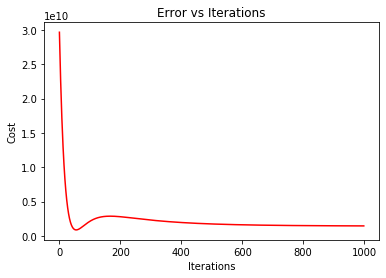

In [5]:
# Import data
data = pd.read_csv('house_practice.csv')

# Extract data into X and y
X = data[['Size', 'Bedrooms']]
y = data['Price']

# Normalize our features
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X] 
# Set hyperparameters
alpha = 0.01
iterations = 1000

# Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost, _ = cost_function(X, y, theta)

print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))
cost_array = MiniBatchGradientDescent(X,y,theta,iterations,learning_rate=0.001,batch_size=2)
plotChart(iterations, cost_array)